## 3. Cálculo de los rendimientos

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

In [6]:
# Librerías a utilizar
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
# Importamos pandas
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)

In [7]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
#     closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = web.YahooDailyReader(tickers, start=start_date, end=end_date, interval='d').read()
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [9]:
import quandl

def get_adj_closes(tickers, start_date=None, end_date=None):

    ######################### USar la api key que les arroja la página de quandl
    quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"

    date = {'gte': start_date, 'lte': end_date }
    column = {'columns': ['ticker', 'date', 'Adj_close']}

    data = quandl.get_table('WIKI/PRICES', qopts=column, ticker=ticker, date=date)# ticker = 'WIKI/AAPL' #'AAPL.US'

    # Poner los índices como las fechas
    data = pd.concat([data[data['ticker'] == ti].set_index('date') for ti in ticker], axis=1).drop(columns=['ticker'])

    # Seleccionar los ADJ_CLOSE de ticker y renombrar las columnas
    data.columns = ticker
    
    return data

<AxesSubplot:xlabel='date'>

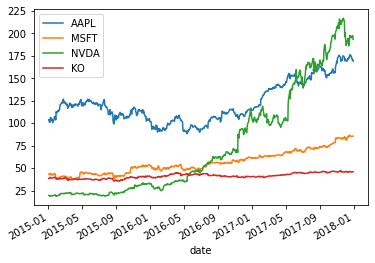

In [19]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', 'KO']
start = '2015-01-01'
end = '2017-12-31'
closes = get_adj_closes(tickers=ticker, start_date=start, end_date=end)
closes.plot()

In [20]:
closes

,AAPL,MSFT,NVDA,KO
date,,,,
2015-01-02,103.863957,43.344312,19.555005,38.527414
2015-01-05,100.937944,42.941088,19.224717,38.527414
2015-01-06,100.947444,42.315395,18.641856,38.819981
2015-01-07,102.362951,42.853027,18.588427,39.304545
2015-01-08,106.295968,44.113683,19.292718,39.779967
...,...,...,...,...
2017-12-22,175.010000,85.510000,195.270000,45.590000
2017-12-26,170.570000,85.400000,197.440000,45.810000
2017-12-27,170.600000,85.710000,197.170000,45.930000


In [21]:
# Función shift 
closes.shift(1)

,AAPL,MSFT,NVDA,KO
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,103.863957,43.344312,19.555005,38.527414
2015-01-06,100.937944,42.941088,19.224717,38.527414
2015-01-07,100.947444,42.315395,18.641856,38.819981
2015-01-08,102.362951,42.853027,18.588427,39.304545
...,...,...,...,...
2017-12-22,175.010000,85.500000,195.890000,45.600000
2017-12-26,175.010000,85.510000,195.270000,45.590000
2017-12-27,170.570000,85.400000,197.440000,45.810000


In [26]:
# Programar la función de rendimiento simple usando shift
Rall = ((closes - closes.shift(1))/ closes.shift(1)).dropna()
Rall

,AAPL,MSFT,NVDA,KO
date,,,,
2015-01-05,-0.028172,-0.009303,-0.016890,0.000000
2015-01-06,0.000094,-0.014571,-0.030318,0.007594
2015-01-07,0.014022,0.012705,-0.002866,0.012482
2015-01-08,0.038422,0.029418,0.037889,0.012096
2015-01-09,0.001072,-0.008405,0.004028,-0.011032
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003165,-0.000219
2017-12-26,-0.025370,-0.001286,0.011113,0.004826
2017-12-27,0.000176,0.003630,-0.001368,0.002620


Ya está implementada la fórmula para obtener cambios porcentuales

In [28]:
# Comparar los resultados con la función pct_change
Rall1 = closes.pct_change(1).dropna()
Rall1

,AAPL,MSFT,NVDA,KO
date,,,,
2015-01-05,-0.028172,-0.009303,-0.016890,0.000000
2015-01-06,0.000094,-0.014571,-0.030318,0.007594
2015-01-07,0.014022,0.012705,-0.002866,0.012482
2015-01-08,0.038422,0.029418,0.037889,0.012096
2015-01-09,0.001072,-0.008405,0.004028,-0.011032
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003165,-0.000219
2017-12-26,-0.025370,-0.001286,0.011113,0.004826
2017-12-27,0.000176,0.003630,-0.001368,0.002620


y la gráfica de los mismos se puede obtener como

<AxesSubplot:xlabel='date'>

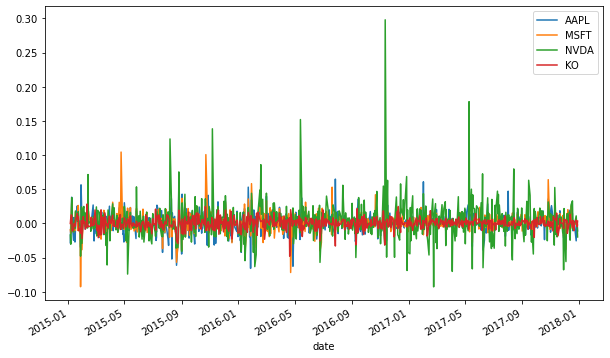

In [33]:
# Graficar los rendimientos simples
Rall.plot(figsize=[10,6])

Donde se observa que el rendimiento tiene una tendencia mas o menos constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python.

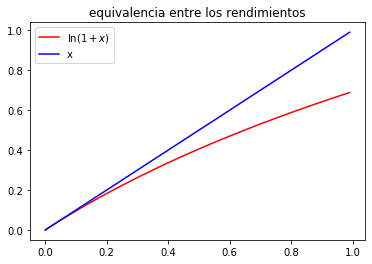

In [15]:
x = np.arange(0,1,0.01)
plt.plot(x,np.log(1+x),'r', label=r'$\ln(1+x)$')
plt.plot(x,x,'b', label='x')
plt.title('equivalencia entre los rendimientos')
plt.legend()
plt.show()

Por lo tanto, basados en el resultados anterior, podemos concluir que si $R_t<<1$ entonces:

$$
\begin{aligned}
&\text{Rendimiento simple}\\
&R_t = \frac{S_t-S_{t-1}}{S_{t-1}}
\end{aligned} \quad
\begin{aligned}
&\text{Rendimiento logarítmico}\\
&r_t = \ln\frac{S_t}{S_{t-1}}
\end{aligned} \longrightarrow r_t \approx R_t
$$

Ahora encontremos el rendimiento logarítmico:

In [35]:
# Cacular los rendimientos logarítmicos
rall = np.log(closes / closes.shift(1)).dropna()
rall

,AAPL,MSFT,NVDA,KO
date,,,,
2015-01-05,-0.028576,-0.009346,-0.017034,0.000000
2015-01-06,0.000094,-0.014678,-0.030787,0.007565
2015-01-07,0.013925,0.012625,-0.002870,0.012405
2015-01-08,0.037703,0.028994,0.037189,0.012023
2015-01-09,0.001072,-0.008441,0.004020,-0.011093
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003170,-0.000219
2017-12-26,-0.025697,-0.001287,0.011052,0.004814
2017-12-27,0.000176,0.003623,-0.001368,0.002616


Notar que, en efecto, las diferencias entre $R_t$ y $r_t$ son muy pequeñas...

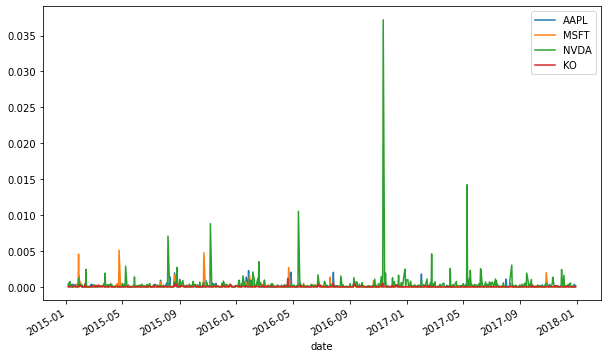

In [36]:
np.abs(rall-Rall).plot(figsize=(10,6));

Escribamos funciones que devuelva los rendimientos diarios (simples y continuamente compuestos), dado un DataFrame de precios...

In [37]:
#rendimientos diarios simples
def simple_daily_ret(closes):
    return closes.pct_change(1).iloc[1:]

def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## ¿Porqué es más usado los rendimientos logarítmicos?

1. **log-normalidad**: si asumimos que los precios se distribuyen log-normalmente, entonces $log( 1 + r_i )$ se distribuye normalmente, lo cual es muy útil ya que muchos teoremas se supone normalidad.
2. Característica más importante es que son **aditivos en el tiempo.**  El producto de variables normalmente distribuidas no es una variable normal. Sin embargo la suma de variables normales no correlacionadas, sí que vuelve a ser una variable normal.
3. la **estabilidad numérica;** la adición de pequeñas cantidades es numéricamente fuerte, mientras que la multiplicación de números pequeños está sujeta a desbordamiento aritmético.

## 4. Gráficos útiles de los rendimientos

Tomemos como ejemplo la serie de precios de cierre de Microsoft y veamos (al menos gráficamente) si los rendimientos si son un proceso estocástico estacionario...

In [38]:
msftAC = closes['MSFT']
msftAC

date
2015-01-02    43.344312
2015-01-05    42.941088
2015-01-06    42.315395
2015-01-07    42.853027
2015-01-08    44.113683
                ...    
2017-12-22    85.510000
2017-12-26    85.400000
2017-12-27    85.710000
2017-12-28    85.720000
2017-12-29    85.540000
Name: MSFT, Length: 754, dtype: float64

In [39]:
Rmsft = simple_daily_ret(msftAC)

In [40]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

In [29]:
%matplotlib notebook

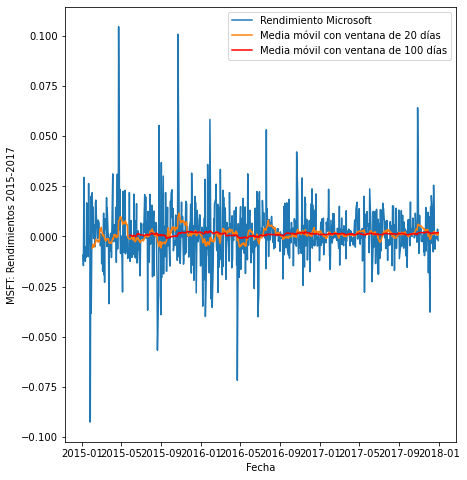

In [41]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label = 'Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, 'r', label = 'Media móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

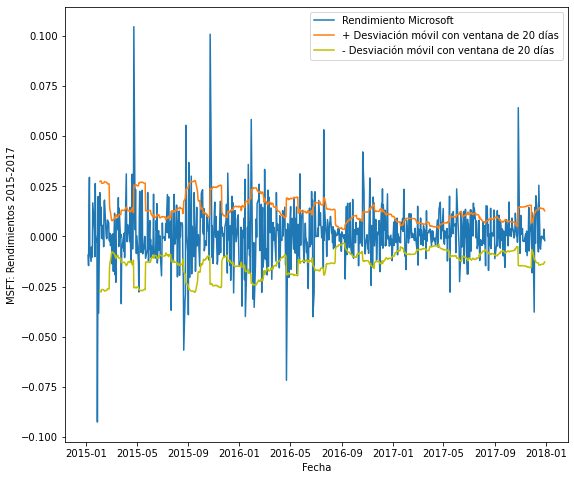

In [42]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

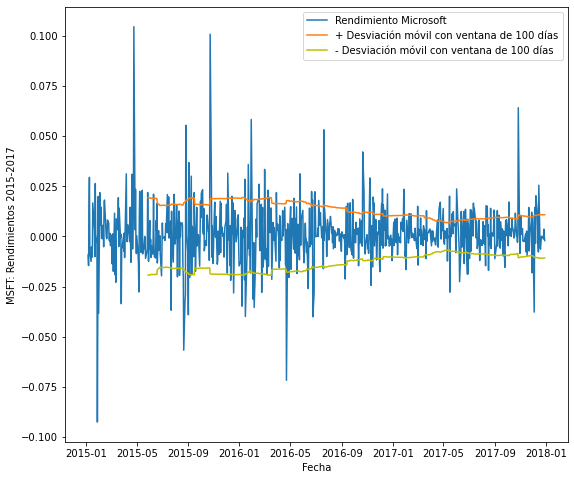

In [43]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

In [36]:
%matplotlib inline

No es estacionario...

Justificar simulación.

Se puede verificar también con un gráfico cuantil-cuantil (qq plot)

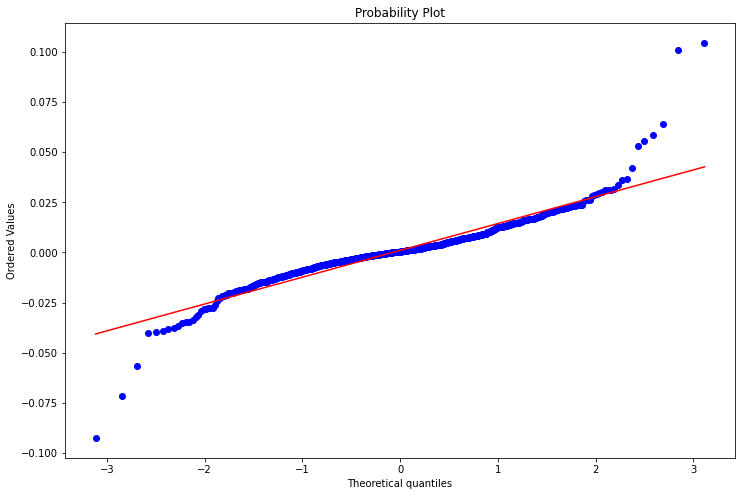

In [49]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(Rmsft, dist=stats.norm, plot=ax, fit=True);

## Está parte la voy a dejar como opcional, debido al tiempo que tenemos pero es muy interesante lo que acá se muestra, para los interesados echarle un ojo. Ahora saltamos a nuestro cuaderno de python de la clase 22.

Una más, con la librería seaborn... También se pueden instalar paquetes de python desde jupyter, usando el comando `!python -m pip install <package>`, como se ilustra a continuación

In [1]:
!python -m conda install seaborn

Solving environment: done

# All requested packages already installed.



In [27]:
import seaborn as sns

Otra manera de instalar una librería, es usar el método clásico de *Anaconda prompt* usando el comando `conda install -c anaconda seaborn`

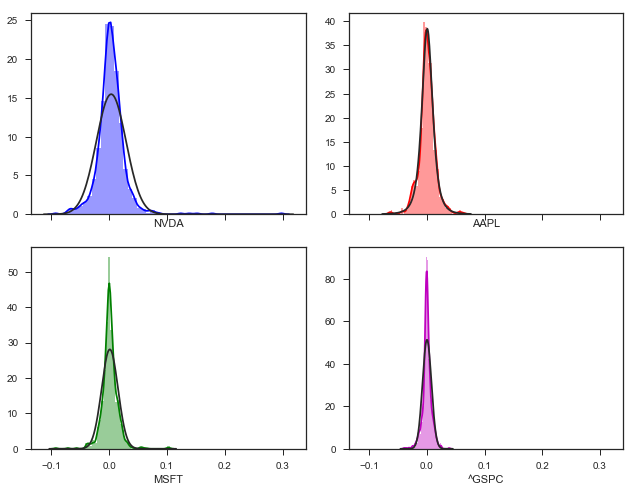

In [43]:
f, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(Rall.loc[:,'NVDA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(Rall.loc[:,'AAPL'], color="r", fit=stats.t, norm_hist=True, ax=axes[0, 1])
sns.distplot(Rall.loc[:,'MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(Rall.loc[:,'^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

## 5. Gráficos de correlación

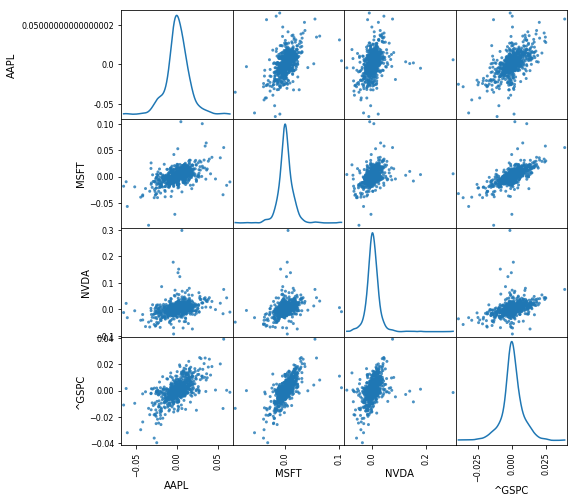

In [37]:
import pandas.plotting as cor
cor.scatter_matrix(Rall, diagonal='kde', alpha=0.8, figsize=(8,8));
# pd.tools.plotting.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));

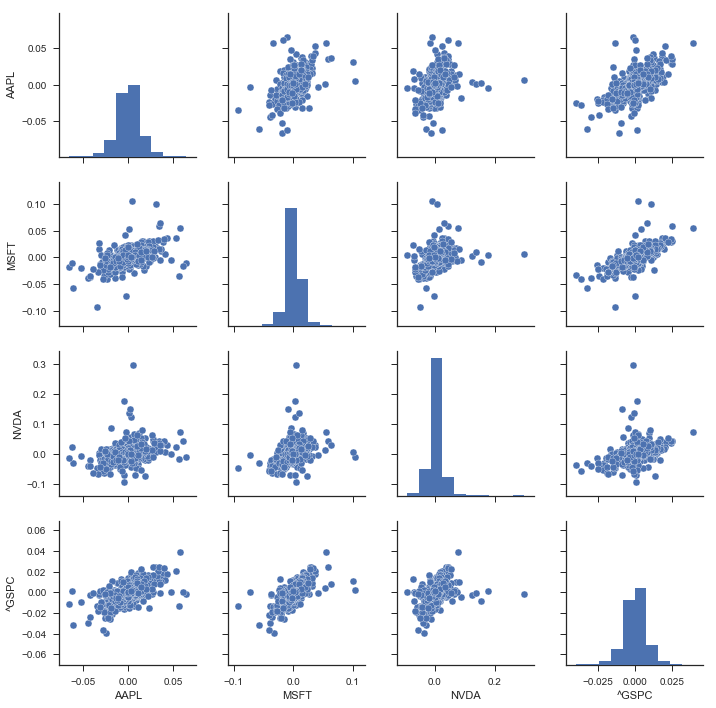

In [38]:
sns.set(style="ticks")
sns.pairplot(Rall);

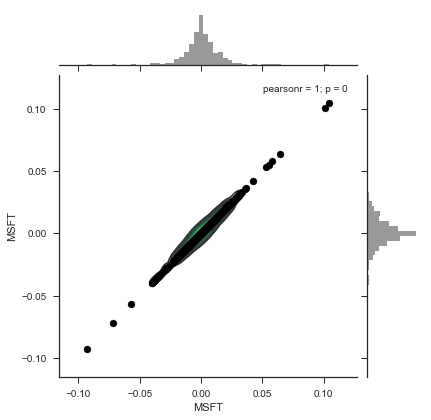

In [48]:
sns.jointplot("MSFT", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

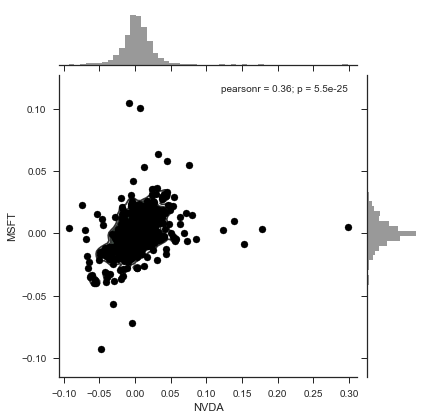

In [49]:
sns.jointplot("NVDA", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

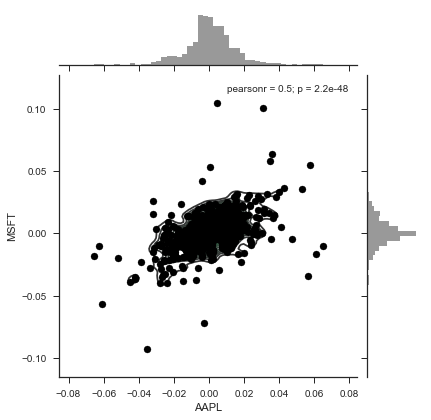

In [67]:
sns.jointplot("AAPL", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

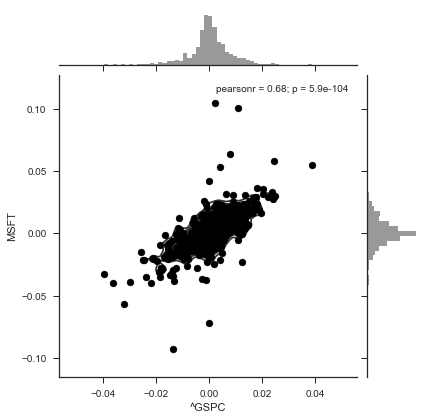

In [68]:
sns.jointplot("^GSPC", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

In [39]:
Rall.corr()

Symbols,AAPL,MSFT,NVDA,^GSPC
Symbols,,,,
AAPL,1.000000,0.497450,0.328940,0.602271
MSFT,0.497450,1.000000,0.363637,0.681244
NVDA,0.328940,0.363637,1.000000,0.397680
^GSPC,0.602271,0.681244,0.397680,1.000000


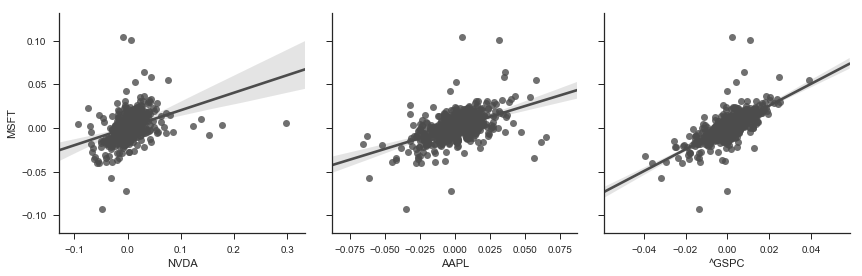

In [40]:
g = sns.PairGrid(Rall, y_vars=["MSFT"], x_vars=["NVDA", "AAPL", "^GSPC"], size=4)
g.map(sns.regplot, color=".3");

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar Jaramillo Z.
</footer>